In [1]:
pip install pylops

     |████████████████████████████████| 174kB 6.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


#### Convolution of two arrays

####  prove that convolution is commutative

In [1]:
import numpy as np
f=[1,0,0,0,-2,0,0,0,0,4];
g=[0,0,-2,0,0,0,0,0,0,0];

In [2]:
h = np.convolve(f,g)

In [3]:
h


array([ 0,  0, -2,  0,  0,  0,  4,  0,  0,  0,  0, -8,  0,  0,  0,  0,  0,
        0,  0])

In [4]:
i = np.convolve(g,f)
i

array([ 0,  0, -2,  0,  0,  0,  4,  0,  0,  0,  0, -8,  0,  0,  0,  0,  0,
        0,  0])

#### Crosscorrelation is equal to reverse time convolution

In [5]:
from scipy import signal
c = signal.correlate(f,g)
c

array([ 0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  4,  0,  0,  0,  0, -8,
        0,  0])

In [6]:
ff_f = f[::-1]
c = signal.convolve(ff_f,g)

In [7]:
c


array([ 0,  0, -8,  0,  0,  0,  0,  4,  0,  0,  0, -2,  0,  0,  0,  0,  0,
        0,  0])

In [8]:
gg_g = g[::-1]

In [9]:
d  = signal.convolve(f,gg_g)
d

array([ 0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,  4,  0,  0,  0,  0, -8,
        0,  0])

#### Ricker wavelet

In [10]:
import matplotlib.pyplot as plt

In [11]:
ric = signal.ricker(100,5)

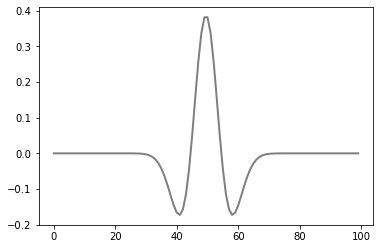

In [12]:
plt.figure(figsize=(6,4))
plt.plot( ric ,lw=2, color='black', alpha=0.5)


#### modeling program for a two-layer model that generates the primary reflection, and the 1st- and 2nd-order multiples 

In [120]:
v1=1.0
v2=2.0
d=.2725
L=1
dx=.005
x=np.arange(0,L,dx)
x1 = np.vectorize(x)
dt =0.006
nx = len(x)
tim = np.arange(0,2.394,0.006)
#nx = np.array(nx)
#nx = nx[0]
nx

399

In [121]:
#define ricker wavelet
ric = signal.ricker(200,15)
r=(v2-v1)/(v2+v1)
r1=r*r
r2=r1*r
from math import sqrt
def timer1(dx,x,dt,d):
    xs=(ixs-1)*dx;
    return round(sqrt((xs-x)**2+(2*d)**2)/v1/dt)+1;  #Primary Time
def timer2(dx,x,dt,d):
    xs=(ixs-1)*dx;
    return round(sqrt((xs-x)**2+(4*d)**2)/v1/dt)+1; #1st Multiple Time
def timer3(dx,x,dt,d):
    xs=(ixs-1)*dx;
    return round(sqrt((xs-x)**2+(6*d)**2)/v1/dt)+1; #2nd Multiple Time
myFn1 = np.vectorize(timer1, excluded=['dx', 'dt', 'd'])
myFn2 = np.vectorize(timer2, excluded=['dx', 'dt', 'd'])
myFn3 = np.vectorize(timer3, excluded=['dx', 'dt', 'd'])

#myFn3(dx,x,dt,d)
for ixs in range(0,nx):
    xs=(ixs-1)*dx;
    f = myFn1(dx,x,dt,d)
    f1= myFn2(dx,x,dt,d)
    f2 =myFn3(dx,x,dt,d)
    


In [122]:
len(f1)

200

In [123]:
s = []
s1 = []
s2 = []
s3 = []
for i in range(0,200):
    s1.append(r/f[i]);#Primary
    s2.append(-r1/f1[i]); # 1st-order Multiple
    s3.append(r2/f2[i]); # 2nd-order Multiple

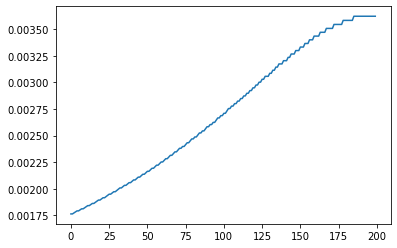

In [124]:
len(s1)
plt.plot(s1)

In [125]:
#convolve now
h = signal.convolve(s1,ric)

In [126]:
h

array([-4.73492400e-12, -1.19364200e-11, -2.28636072e-11, -3.93544877e-11,
       -6.41138224e-11, -1.01076082e-10, -1.56023707e-10, -2.37314789e-10,
       -3.56978257e-10, -5.32327610e-10, -7.88059432e-10, -1.15925812e-09,
       -1.69548421e-09, -2.46647990e-09, -3.56978679e-09, -5.14113084e-09,
       -7.36848452e-09, -1.05107288e-08, -1.49225746e-08, -2.10874564e-08,
       -2.96608625e-08, -4.15267549e-08, -5.78708475e-08, -8.02751641e-08,
       -1.10838991e-07, -1.52332875e-07, -2.08393172e-07, -2.83766346e-07,
       -3.84613235e-07, -5.18885559e-07, -6.96788384e-07, -9.31343518e-07,
       -1.23907079e-06, -1.64080493e-06, -2.16266698e-06, -2.83720883e-06,
       -3.70474948e-06, -4.81491986e-06, -6.22842977e-06, -8.01906649e-06,
       -1.02759281e-05, -1.31058855e-05, -1.66362570e-05, -2.10176646e-05,
       -2.64270264e-05, -3.30706181e-05, -4.11871174e-05, -5.10505203e-05,
       -6.29727908e-05, -7.73060845e-05, -9.44443534e-05, -1.14824121e-04,
       -1.38924194e-04, -

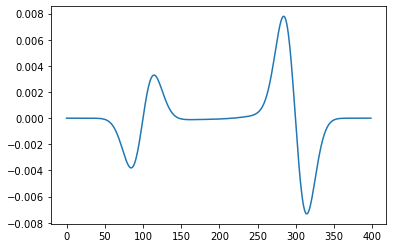

In [129]:
plt.plot(h)
